# Accomplishments Thus Far

* Handled all of the missing data in the Age, Cabin, & Embarked features.

* One Hot Encoded the Cabin & Embarked features. 

* Saved visualizations in the output file

* Created a deep copy data set called df_filtered that only contains the numerical features of the data set.

* Split data into training & test sets

* Decided on implementing a Linear Regression model 

* Implemented cross-validation on the training sets using the Stratified K-Fold method

* Visually displayed the performance of the model using a confusion matrix & classification report

* Optimized Linear Regression model using Grid Search for hyperparameter tuning


# Research Assignment

For this research project, I will create a machine learning model that will accurately predict whether or not a passenger survived the Titanic. I will do so using the tools & concepts I've learned throughout this course. First, I will read in the titanic_passengers.csv data set as a Pandas Data Frame and display the first 5 records.

In [1]:
# Import dataset

import pandas as pd

df = pd.read_csv('./assets/titanic_passengers.csv')

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# EDA

Before I can start training the model, I need to perform Exploratyor Data Analysis (EDA) and ensure that there is a clean data set with relevant information to the target feature (Survived).

# Check for Missing Values

To start out, I will check to see if there are any missing values in the Titanic Passengers data set using the missingno library. I will also save the image, along with other visualizations, to a file in the output folder. 

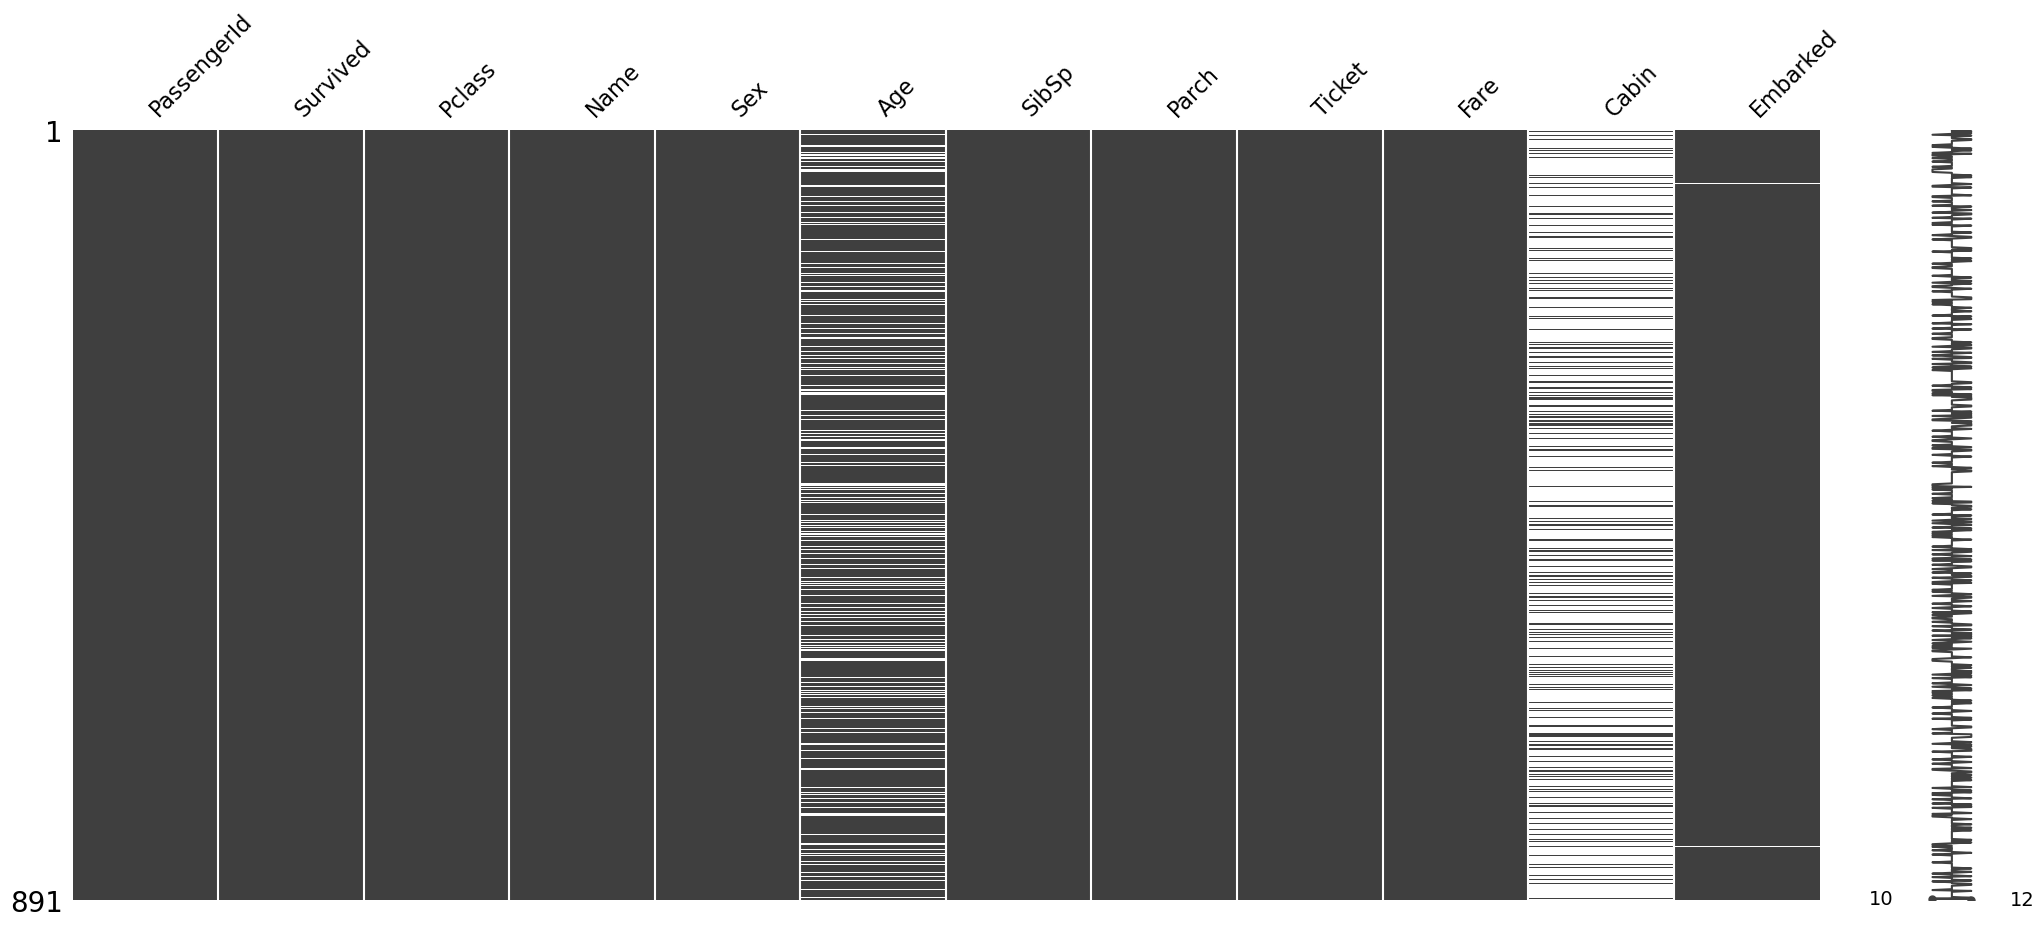

In [2]:
# Check for missing values.
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df)
plt.savefig('./output/eda_missing_values.png')
plt.show()

This is an alternate way to check for missing values, while also exploring exlporing more information about each feature and their data types.

In [3]:
# Check for missing values.

print('\n\nFeature Info:\n\n')
print(df.info())
print('\n\nMissing Values:\n\n')
print(df.isnull().sum())
print('\n\nFeature Descriptions:\n\n')
print(df.describe(include='all'))



Feature Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Missing Values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

# Visualize Distributions

To get an all encompassing view of any potential relationships between each feature, I will generate a pairplot to visualize their distributions and save the image to the output folder.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

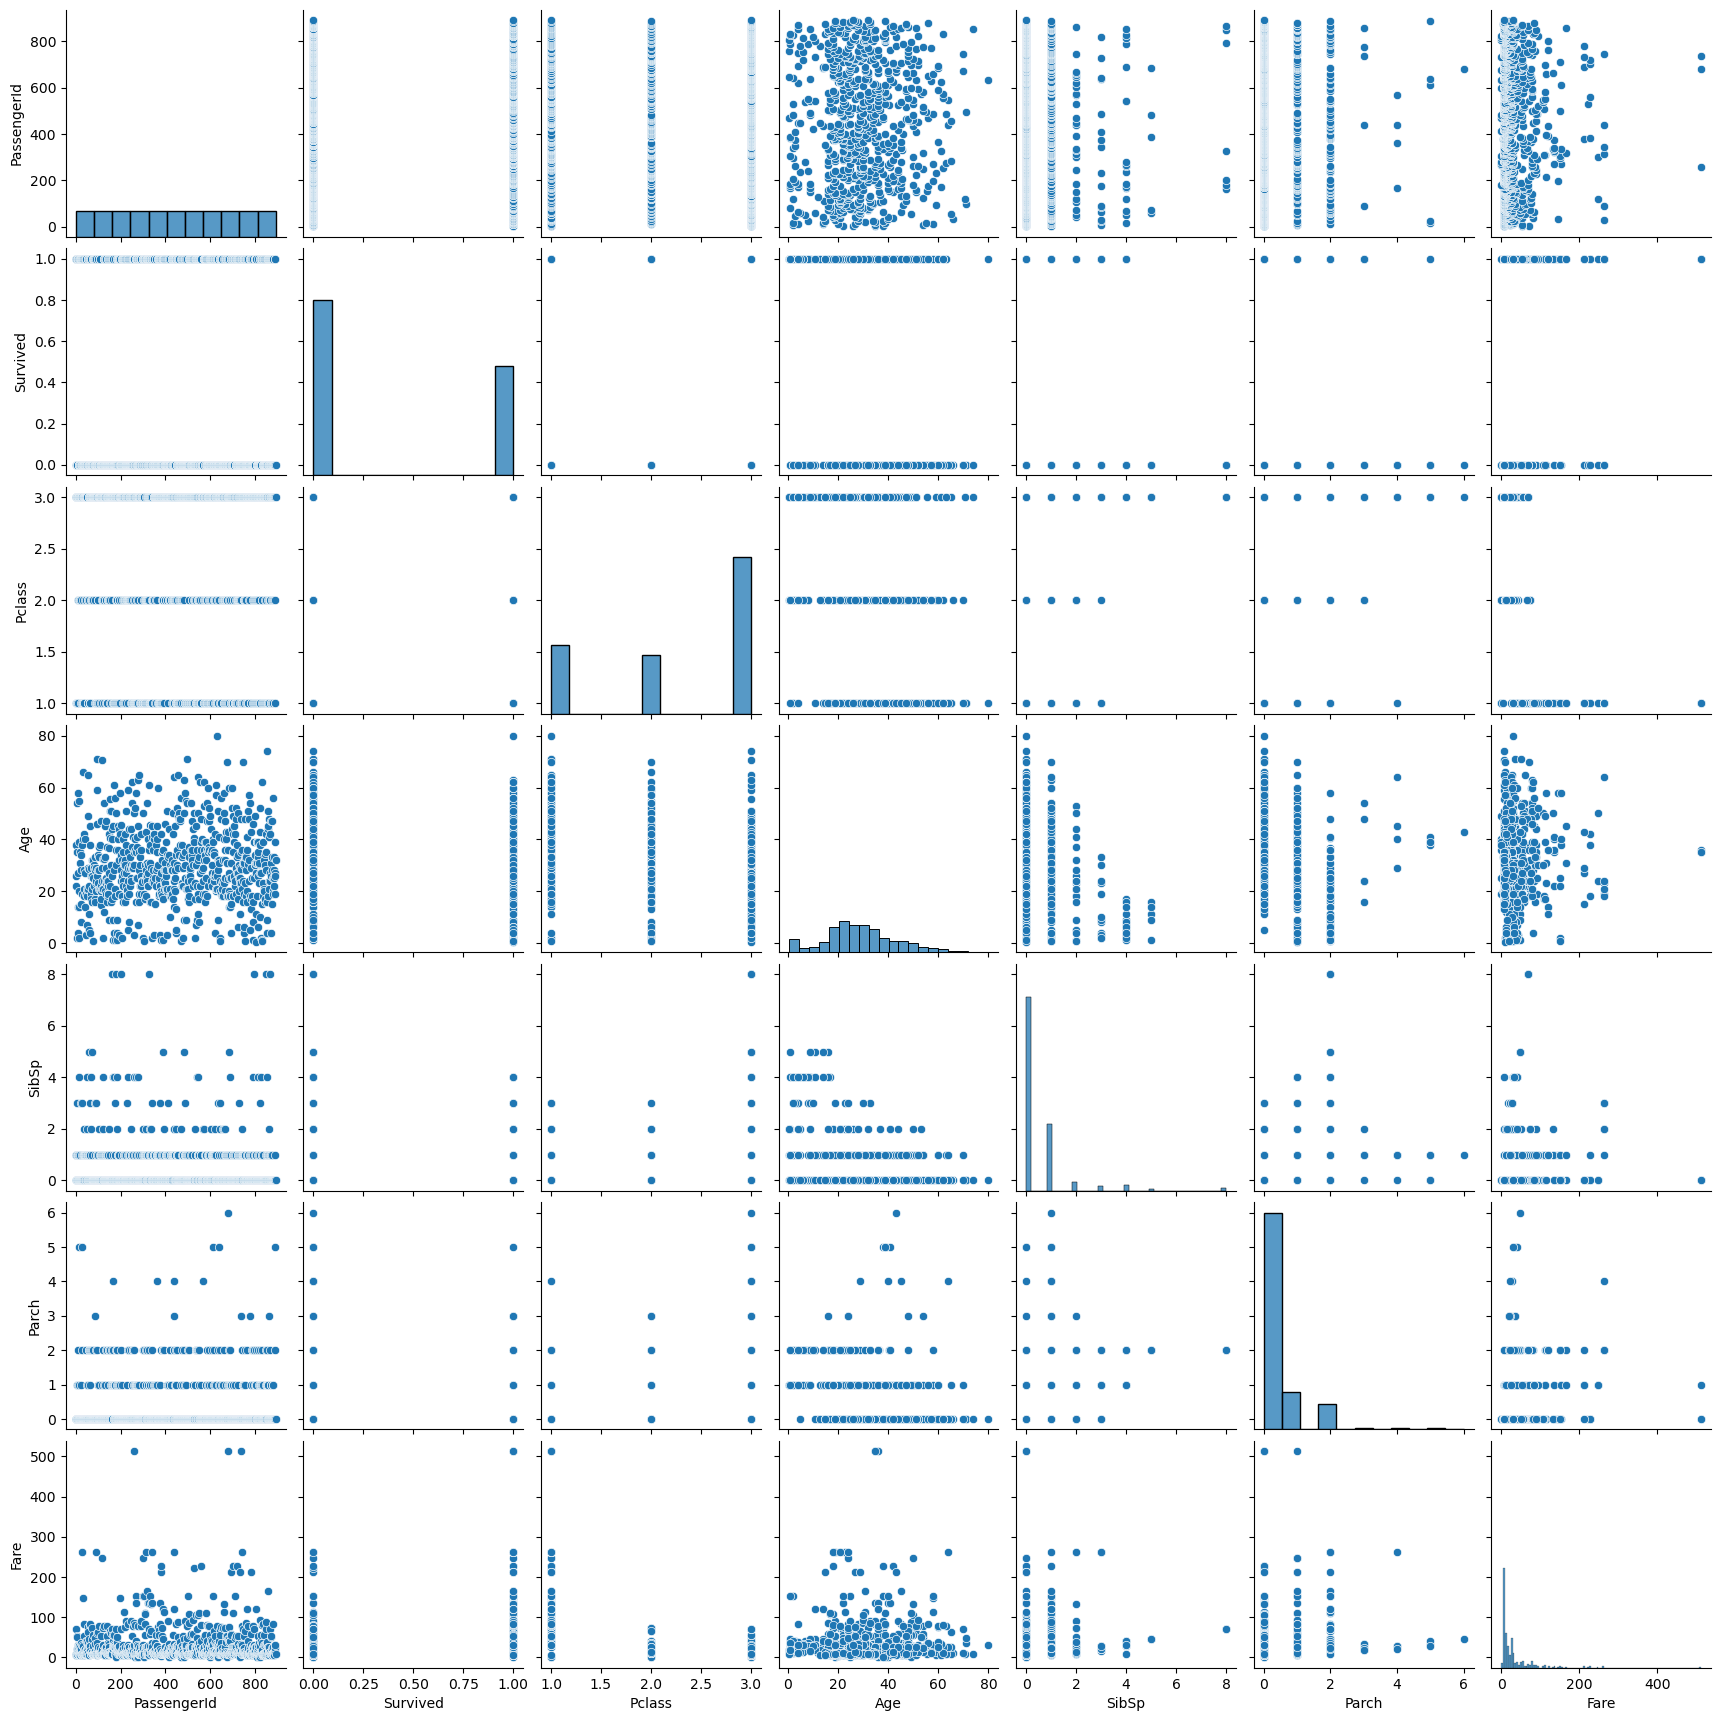

In [4]:
# Examine the distribution using a pairplot

import seaborn as sns

# Create plot
plt.figure(figsize=(12, 6))
sns.pairplot(df)

# Save pairplot to file in output directory
plt.savefig('./output/eda_pairplot.png')
plt.show()

# Encode Categorical Data

After examining the data set, there are a few categorical features that are relevant to our output variable (Survived) such as Sex, Cabin, & Embarked. To make use of these features for my model, I will have to encode the data into numerical values.

To start out, I will encode the Sex feature using binary encoding with males encoded as 0 & females encoded as 1.

In [5]:
# Encode categorical feature Sex

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # Binary encoding

df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

# One Hot Encoder

For the Embarked column, I will utilize the One Hot Encoder method to convert the categorical information into numerical values. I will then drop one of the columns to avoid the dummy variable trap. When using the one-hot encoding method, it is necessary to drop one of the columns to avoid multi-colinearity. For the 2 missing values in the Embarked column, I just replaced them with the most reoccuring value of 'S'.

In [6]:
# Encode categorical feature Embarked

from sklearn.preprocessing import OneHotEncoder


df['Embarked'].fillna('S', inplace=True) # Replaces 2 missing values in the featuer with the most reoccuring value 'S'

# One hot encoder method
# Drop a single column to avoid the dummy variable trap
# Set 'sparse_output' to equal false to return a 2D array

encoder = OneHotEncoder(drop='first', sparse_output=False)  
one_hot_embarked = encoder.fit_transform(df[['Embarked']])

# Convert the result back to a DataFrame 
one_hot_embarked_data_frame = pd.DataFrame(
    one_hot_embarked, 
    columns=encoder.get_feature_names_out(['Embarked']) # Maintains uniform column naming for new features generated.
)

# Combine results with original data frame
df = pd.concat([df.drop(columns=['Embarked']), one_hot_embarked_data_frame], axis=1)

df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN         0.0         1.0  
1          PC 17599  71.2833   C85         0.0         0.0  
2  STON/O2. 3101282   7.9250   NaN         0.0         1.0  
3            113803  53.1000  C123         0.0         1.0  
4            373450   8.0500   NaN         0.0         1.0

# Cabin & Dealing With Its Many Missing Values

As shown above in the missing values matirx, the cabin feature is missing a lot of values. To address this, I can either drop the column entirely, or I can try to do some feature engineering to get some relevant information from what little data the feature contains. I want my model to be as accurate as possible, so I will do the latter and perform some feature engineering.

To do this, I will separate the column into two features, Cabin_Known & Cabin_Deck. Cabin_Known will be 0 if the Cabin value is missing, and will be 1 if it is present. Cabin_Deck will be the First letter of the Cabin value, representing the Deck that the cabin is on; if the Cabin value is missing, the Cabin_Deck will be 'Unkown'. 

In [7]:
# Feature engineer 'Cabin' into 2 separate features 'Cabin_known' & 'Cabin_deck'

df['Cabin_Known'] = df['Cabin'].notnull().astype(int) # Determines if the cabin is known

# Obtain the Cabin_Deck feature by extracting the first letter of the Cabin value
# Fill missing Cabin values with 'Unknown'
df['Cabin_Deck'] = df['Cabin'].str[0].fillna('Unknown')

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  Cabin_Known  \
0         A/5 21171   7.2500   NaN         0.0         1.0            0   
1          PC 17599  71.2833   C85         0.0         0.0            1   
2  STON/O2. 3101282   7.9250   NaN         0.0         1.0            0   
3            113803  53.1000  C123         0.0         1.0            1   
4            373450   8.0500   NaN         0.0         1.0            0   

  Cabin_Deck  
0    Unknown  
1          C  
2    Unknown  
3          C  
4    Unknown

# Encode Cabin_Deck

Given that I can only have numerical data for my learning model, I will one hot encode the newly created Cabin_Deck feature

In [8]:
# One hot encode the Cabin_Deck feature

encoder = OneHotEncoder(drop='first', sparse_output=False) # drop='first' avoids dummy variable trap
one_hot_cabin_deck = encoder.fit_transform(df[['Cabin_Deck']])

# Convert the result back to a DataFrame 
one_hot_cabin_deck_data_frame = pd.DataFrame(
    one_hot_cabin_deck, 
    columns=encoder.get_feature_names_out(['Cabin_Deck']) # Maintains uniform column naming for new features generated.
)

# Combine results with original data frame
df = pd.concat([df.drop(columns=['Cabin_Deck']), one_hot_cabin_deck_data_frame], axis=1)

df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  ... Embarked_S  Cabin_Known  Cabin_Deck_B  \
0         A/5 21171   7.2500  ...        1.0            0           0.0   
1          PC 17599  71.2833  ...        0.0            1           0.0   
2  STON/O2. 3101282   7.9250  ...        1.0            0           0.0   
3            113803  53.1000  ...        1.0            1           0.0   
4            373450   8.0500  ...        1.0            0           0.0   

   Cabin_Deck_C  Cabin_Deck_D  Cabin_Deck_E  Cabin_Deck_F  Cabin_Deck_G  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           1.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Cabin_Deck_T  Cabin_Deck_Unknown  
0           0.0                 1.0  
1           0.0                 0.0  
2           0.0                 1.0  
3           0.0                 0.0  
4           0.0                 1.0  

[5 rows x 22 columns]

# KNN Imputation For the Age Feature

The Age column is missing 177 values; to address this, I will implement the K-Nearest Neighbors (KNN) imputation method to predict what those missing values might be. It does so by finding the most similar rows in the dataset and using their values to compute the missing ones.

In [9]:
# Handle missing values for the 'Age' feature by implementing the KNNImputer method

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Features relevant to 'Age' & 'Age' itself
relevant_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age']

# Extract relevant columns for imputation
relevant_data = df[relevant_features]

# Standardize features (except for 'Age' which contains missing values)
scaler = StandardScaler()
scaled_data = relevant_data.copy() # Preserves original data
scaled_data.iloc[:, :-1] = scaler.fit_transform(relevant_data.iloc[:, :-1])


# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = knn_imputer.fit_transform(scaled_data)

# Replace the original 'Age' column

df['Age'] = data_imputed[:, -1] # Only copies the last column in the data_imputed array (The 'Age' column) 

print(df['Age'].isnull().sum()) # Checks if there are any missing values in the 'Age' Feature

0


In [10]:
# Check to see if there are any non-numerical columns left

print(df.dtypes)

PassengerId             int64
Survived                int64
Pclass                  int64
Name                   object
Sex                     int64
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked_Q            float64
Embarked_S            float64
Cabin_Known             int32
Cabin_Deck_B          float64
Cabin_Deck_C          float64
Cabin_Deck_D          float64
Cabin_Deck_E          float64
Cabin_Deck_F          float64
Cabin_Deck_G          float64
Cabin_Deck_T          float64
Cabin_Deck_Unknown    float64
dtype: object


# Removing Irrelevant Features For Heat Map

As shown above, the only non-numerical features left are Name, Ticket, & Cabin. I will drop the Cabin Feature because it contains a lot of missing values, and I already encoded it through the Cabin_Known & Cabin_Deck features. I will remove the Name & Ticket features because they likely don't correlate with the target feature Survived.

In [11]:

df_numeric = df.copy() # Deep copies original data

df_numeric.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True) # Drop irrelevant features

print(df_numeric.dtypes)


Survived                int64
Pclass                  int64
Sex                     int64
Age                   float64
SibSp                   int64
Parch                   int64
Fare                  float64
Embarked_Q            float64
Embarked_S            float64
Cabin_Known             int32
Cabin_Deck_B          float64
Cabin_Deck_C          float64
Cabin_Deck_D          float64
Cabin_Deck_E          float64
Cabin_Deck_F          float64
Cabin_Deck_G          float64
Cabin_Deck_T          float64
Cabin_Deck_Unknown    float64
dtype: object


In [12]:
# Check to make sure that there are no more missing values.

print(df_numeric.isnull().sum())

Survived              0
Pclass                0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked_Q            0
Embarked_S            0
Cabin_Known           0
Cabin_Deck_B          0
Cabin_Deck_C          0
Cabin_Deck_D          0
Cabin_Deck_E          0
Cabin_Deck_F          0
Cabin_Deck_G          0
Cabin_Deck_T          0
Cabin_Deck_Unknown    0
dtype: int64


# Correlation Plot

Now that I have handled all of the missing values & encoded the relevant categorical data, I will use a heatmap to display a Correlation Matrix for the data set & save the image to the output folder.

In [13]:
# Create a correlation matrix using seaborn heatmap function

# Create plot
plt.figure(figsize=(12, 6))

sns.heatmap(df_numeric.corr(), annot=True) # Creates heatmap using only numerical features

# Save pairplot to file in output directory
plt.savefig('./output/eda_corrplot.png')

# Standardize Age & Fare Features

To help the model perform better, I will standardize the Age & Fare features to ensure the larger values do not cause any issues during training.

In [14]:
# Scale 'Age' and 'Fare' features
scaler = StandardScaler()
df_numeric[['Age', 'Fare']] = scaler.fit_transform(df_numeric[['Age', 'Fare']])

# Split Data Into Training & Test Sets

Now that I have prepped the data for the learning model, I will now split it into two sets for training & testing. 

In [15]:
# Split data into training & test sets 

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df_numeric.drop(columns=['Survived'])  # Features
y = df_numeric['Survived']  # Target variable

# 80-20 split between training & test sets
# 23 will be used for all randomization seeds to ensure reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23) 

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((712, 17), (179, 17), (712,), (179,))

# Implement Logistic Regression Model With Cross Validation

The first machine learning model I will be using is the Logistic Regression Model, a simple yet effective linear model for binary classification. This model is ideal for our target feature Survived.

To help with training for the model, I will spit the training data into 5 groups for cross validation. To do this, I will use the Stratified K-Fold method given that my output variable (Survived) is a clssification output. 

In [16]:
# Implement cross-validation on the training dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=23) # max_iter=1000 optimizes convergence

# Define Stratified K-Fold Cross-Validation
cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=23) # Creates 5 folds

# Perform Cross-Validation and compute accuracy scores
scores = cross_val_score(model, X_train, y_train, cv=cross_val, scoring='accuracy')

# Display Cross-Validation Results
scores.mean(), scores.std(), scores

(0.8132867132867133,
 0.03076763857075628,
 array([0.78321678, 0.78321678, 0.86619718, 0.82394366, 0.80985915]))

# Train Model on Entire Training set & Visualize Results

Now that I have performed cross-validation, I will now train the Logistic Regression model on the entire training data set. I will also generate a classification report & confusion matrix to see how well the model performed.

Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.81      0.84      0.83       115
       Survived       0.69      0.64      0.67        64

       accuracy                           0.77       179
      macro avg       0.75      0.74      0.75       179
   weighted avg       0.77      0.77      0.77       179



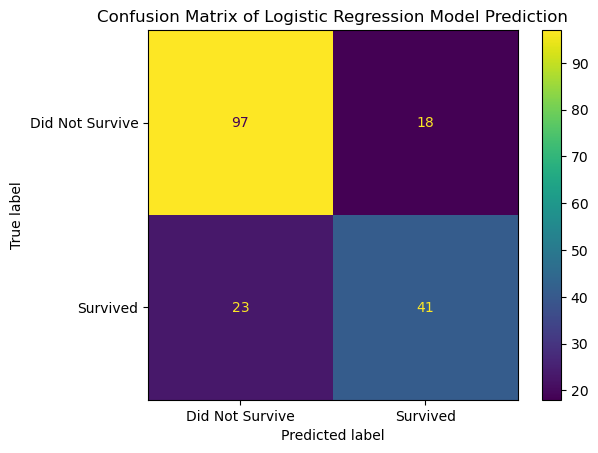

In [17]:
# Visually display the performance of the model using a confusion matrix & classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


model.fit(X_train, y_train) # Train model on training data

y_pred = model.predict(X_test) # Prediction on the test set

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived'])

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Classification Report:\n", class_report)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Did Not Survive', 'Survived'])

display.plot(cmap='viridis')

plt.title('Confusion Matrix of Logistic Regression Model Prediction')
plt.savefig('./output/logistic_regression_confusion_matrix.png')
plt.show()

# Hyperparameter Tuning Using GridSearchCV

To figure out the best parameters to use for my Logistic Regression model, I will use a Grid Search for hyperparameter tuning.

In [18]:
# Optimize model using Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Solvers that support l1 and l2 penalties
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    n_jobs= -1  # Use all available CPU cores to decrease runtime
)

grid_search.fit(X_train, y_train) # Fit GridSearchCV to the training data

# Display the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score:.4f}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.8147


# Re-train Model using the Best Parameters

After performing the Grid Search, I will re-train the model using the updated hyperparameters and see if the test scores are any better.

Test Accuracy: 0.7821
Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.81      0.86      0.84       115
       Survived       0.72      0.64      0.68        64

       accuracy                           0.78       179
      macro avg       0.77      0.75      0.76       179
   weighted avg       0.78      0.78      0.78       179



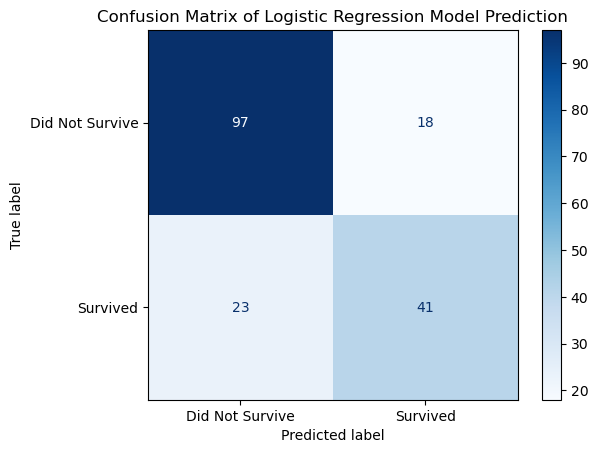

In [19]:
# Re-train model & display metrics
from sklearn.metrics import accuracy_score

# re-train model on entire training set using the optimized hyperparameters

model_optimized = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000, random_state=23)
model_optimized.fit(X_train, y_train)

# Predict the model on the testing data set
y_test_pred = model_optimized.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report
class_report = classification_report(y_test, y_test_pred, target_names=['Did Not Survive', 'Survived'])

# Display results
print("Classification Report:\n", class_report)

# Generate & display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Did Not Survive', 'Survived'])

display.plot(cmap='Blues')

plt.title('Confusion Matrix of Logistic Regression Model Prediction')
plt.savefig('./output/logistic_regression_confusion_matrix_optimized.png')
plt.show()

# Decision Tree Model

The Logistic Regression model, even with optimized hyperparameters, resulted in a score of 78% accuracy. I will now try a different classification model to see if it will perform better. The model I will be using now is the Decision Tree Model.

Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.83      0.83      0.83       115
       Survived       0.69      0.70      0.70        64

       accuracy                           0.78       179
      macro avg       0.76      0.76      0.76       179
   weighted avg       0.78      0.78      0.78       179



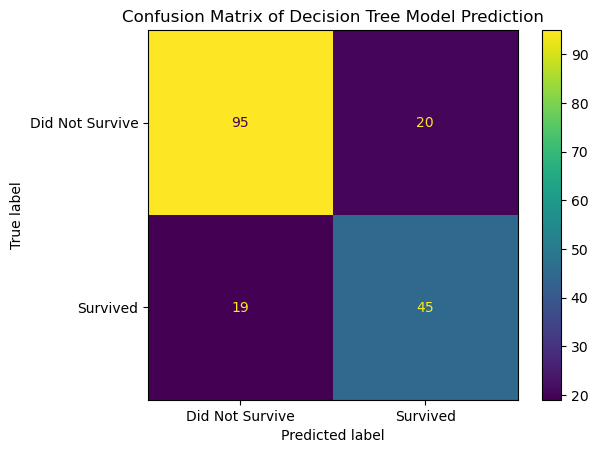

In [20]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=23) # Change the model to a Decision Tree Algorithm
dt_model.fit(X_train, y_train) # Train model on training data

y_pred = dt_model.predict(X_test) # Prediction on the test set

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived'])

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Classification Report:\n", class_report)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Did Not Survive', 'Survived'])

display.plot(cmap='viridis')

plt.title('Confusion Matrix of Decision Tree Model Prediction')
plt.savefig('./output/decision_tree_confusion_matrix.png')
plt.show()

# Hyperparameter Tuning For Decision Tree

I will now try to optimize the hyperparameters for the Decision Tree Model using a GridSearchCV like I did for the Logistic Regression model.

In [21]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'], # Function to measure quality of split
    'splitter': ['best', 'random'],  # Strategy used to choose the split at each node
}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    n_jobs= -1  # Use all available CPU cores to decrease runtime
)

grid_search.fit(X_train, y_train) # Fit GridSearchCV to the training data

# Display the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score:.4f}")

Best Parameters: {'criterion': 'entropy', 'splitter': 'best'}
Best Accuracy: 0.7949


# Re-train Model using the Best Parameters

After performing the Grid Search, I will re-train the model using the updated hyperparameters and see if the test scores are any better.

In [22]:

dt_model_optimized = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=23) 
dt_model_optimized.fit(X_train, y_train) # Train model on training data

y_pred = dt_model_optimized.predict(X_test) # Prediction on the test set

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived'])

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Classification Report:\n", class_report)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Did Not Survive', 'Survived'])

display.plot(cmap='viridis')

plt.title('Confusion Matrix of Decision Tree Model Prediction')
plt.savefig('./output/decision_tree_confusion_matrix_optimized.png')
plt.show()

Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.84      0.84      0.84       115
       Survived       0.71      0.70      0.71        64

       accuracy                           0.79       179
      macro avg       0.78      0.77      0.77       179
   weighted avg       0.79      0.79      0.79       179



# Comparison between Logistic Regression & Decision Tree models

Overall, both models performed roughly the same, even with optimized hyperparameters. Both models scored around 77-79% accuracy, with the Decision Tree model being slighly more accurate. Both models scored much higher predicting passengers who did not survive; this is likely due to the class imbalance within the data set, with there being far more passengers who did not survie the titanic compared to those who did.

# Random Forest Classifier

Just out of curiosity, I will try another type of decision tree model called Random Forest to see if it will perform any better than the previous two models.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=23) # Change the model to a Random Forest Algorithm
rf_model.fit(X_train, y_train) # Train model on training data

y_pred = rf_model.predict(X_test) # Prediction on the test set

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived'])

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Classification Report:\n", class_report)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Did Not Survive', 'Survived'])

display.plot(cmap='viridis')

plt.title('Confusion Matrix of Random Forest Model Prediction')
plt.savefig('./output/random_forest_confusion_matrix.png')
plt.show()

Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.87      0.87      0.87       115
       Survived       0.77      0.77      0.77        64

       accuracy                           0.83       179
      macro avg       0.82      0.82      0.82       179
   weighted avg       0.83      0.83      0.83       179



# Hyperparameter Tuning 

The Random Forest Model performed significantly better than the previous two models with an f1-score of 0.87 & an accuracy of 83%. I will optimize the hyperparameters to see if I can get an even better score.

In [24]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], # Number of trees in the forest
    'criterion': ['gini', 'entropy'], # Function to measure quality of split
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when splitting a node
    'bootstrap': [True, False] # Whether to use bootstrapped samples when building trees.
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    n_jobs= -1  # Use all available CPU cores to decrease runtime
)

grid_search.fit(X_train, y_train) # Fit GridSearchCV to the training data

# Display the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score:.4f}")

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 400}
Best Accuracy: 0.8174


# Re-train Model using the Best Parameters

After performing the Grid Search, I will re-train the model using the updated hyperparameters and see if the test scores are any better.

Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.87      0.86      0.86       115
       Survived       0.75      0.77      0.76        64

       accuracy                           0.83       179
      macro avg       0.81      0.81      0.81       179
   weighted avg       0.83      0.83      0.83       179



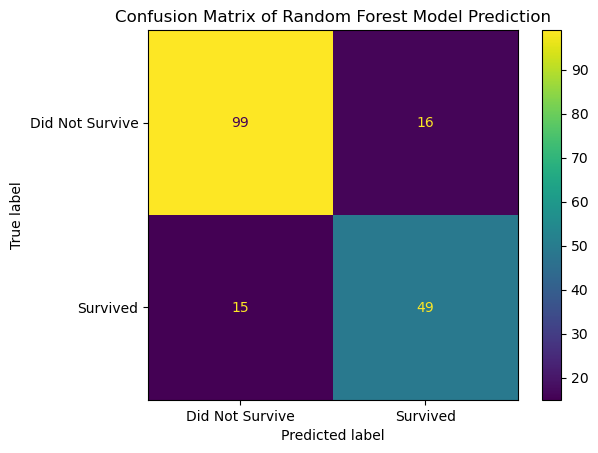

In [25]:
# Re-train model with optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=400,
    criterion='entropy', 
    max_features='sqrt',
    bootstrap=True, 
    random_state=23
)
rf_model.fit(X_train, y_train) # Train model on training data

y_pred = rf_model.predict(X_test) # Prediction on the test set

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived'])

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Classification Report:\n", class_report)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Did Not Survive', 'Survived'])

display.plot(cmap='viridis')

plt.title('Confusion Matrix of Random Forest Model Prediction')
plt.savefig('./output/random_forest_confusion_matrix_optimized.png')
plt.show()


# Accuracy

* Logistic Regression: 78%

* Decision Tree: 79%

* Random Forest: 83% 


# Conclusions

After performing EDA, I cleaned the data set by addressing all of the missing values & encoding the categorical features relevant to the output variable (Survived). I used binary encoding for the Sex feature, I one hot encoded the Embarked & Cabin features, and I used KNN imputation to address the missing values in the Age feature. I used the data set to train three different machine learning models; first I used the Logistic Regression, Decision Tree, & Random Forest models. The Random Forest model proved to be the most accurate, with a 0.86 f1-score & 83% accuracy. All three models were able to predict passengers who didnt survive more accurately than passengers who did survive. This is likely due to the class imbalance of the target feature (most of the passengers on the titanic did not survive). Based on the correlation matrix, Sex was the most correlated feature to the output variable, indicating that whether the passenger was a man or woman was a good predictor if the passenger survived or not. 
